<h2> Universally Used Functions

Generate Data Function

In [1]:
import random
import time
import pandas as pd

random.seed(time.time())

def generate_data(size, linearly_separable=True, min_dist_btwn_points=0):
    data = [[0 for x in range(2)] for y in range(size)] 
    
    #tracks the number of points in each class
    numPos = 0
    numNeg = 0
    
    # Initialize points and their values
    for i in range(size):

        # Create random data point
        data[i][0] = random.randint(1,100)
        data[i][1] = random.randint(1,100)

        # Create optional distance between classes
        while(abs(data[i][0] - data[i][1]) <= min_dist_btwn_points):
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100)
            
        # Make sure there are equal amounts in each class
        while(numPos >= (size / 2) and data[i][0] < data[i][1]):
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100) 
        while(numNeg >= (size / 2) and data[i][0] >= data[i][1]):
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100)
            
        # Point's position relative to x = y line determines value        
        if (data[i][0] < data[i][1]):
            data[i].append(1)
            numPos += 1
        else:
            data[i].append(-1)
            numNeg += 1

        # Create non-linearly separable data by switching up the value 10% of the time
        if (not linearly_separable and random.randint(1,10) % 10 == 0):
            data[i][2] *= -1
            
    return data

In [2]:
def sep_data(data):
    #separate the points from values for sake of pla
    values=[]
    points=[]
    for i in range(len(data)):
        values.append(data[i][2])
        points.append([1, data[i][0], data[i][1]]) #1 is neeeded as the first component before the points, per PLA
    
    return [points, values]

Plot Data Function

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_data(data, graph_title, weights=[]):
    
    df = pd.DataFrame(data, columns=("X", "Y", "value"))
    df.plot.scatter(x="X", y="Y", c="value", cmap='viridis', title=graph_title)

    # weights[0] + weights[1]*(x) + weights[2]*(y) = 0
    if weights:
        x = np.array(range(100))
        y = ((-1*weights[0]) - weights[1]*x) / weights[2]
        plt.plot(x, y) 

Order Data Function

In [4]:
def order(data):
    ordered_data = []
    for i in range(len(data)):
        if data[i][2] > 0:
            ordered_data.append(data[i])
            
    for i in range(len(data)):
        if data[i][2] <= 0:
            ordered_data.append(data[i])
            
    return ordered_data

PLA Algorithm

In [5]:
import numpy as np
def num_missclassified_points(w, x, y):
    missed_points = []
    labels_this_run = np.sign(np.dot(x,w)) 
    for i in range(len(x)):
        if labels_this_run[i] != y[i]:
            missed_points.append(i)
    return len(missed_points)

In [6]:
import numpy as np
def pla(x, y, passes, step_size=1, w=[0,0,0]):
    
    num_updates = 0 #keep track of updates
    num_missed_points = len(x) #assume it starts with them all missclassified
    min_error_result = w #keep track of the min error case for non-linearly separable data
    
    for c in range(passes):
        updated = False
        for i in range(len(x)):
            if y[i] * np.dot(w, x[i]) <= 0:
                update = [step_size * y[i] * point for point in x[i]]
                w = [sum(i) for i in zip(*[w,update])] #returns a vector of the sums of corresponding values in each vector (w and update) 
                
                updated = True
                num_updates += 1
                
                #check for the number of misclassified points and keep track of the min error
                if num_missclassified_points(w, x, y) < num_missed_points:
                    num_missed_points = num_missclassified_points(w, x, y)
                    min_error_result = w
        
        if not updated:
            break
    
    if not updated:
        print("First solution found: " , w)
    else:
        print("No perfect solution found, best solution found is ", min_error_result)
        w = min_error_result #return best solution found
    
    result = {}
    result['w'] = w
    result['updates'] = num_updates
    result['iterations'] = c + 1
    return result
                    

Print Data Function

In [7]:
def accuracy(weights, data):
    points = sep_data(data)[0]
    values = sep_data(data)[1]
    return float(num_missclassified_points(weights, points, values)) / len(data)

In [29]:

def print_stats(train_ls,test_ls, weights, step, final_weights, total_updates, iterations, train_accuracy, test_accuracy):
    print('1. We followed the above algorithm to generate data points')
    print('2. Linearly separable training data :', train_ls)
    print('3. Linearly separable test data:', test_ls)
    print('4. Initial learning weights:', weights, 'and step size constant:', step)
    print('5. y =' , '(' , final_weights[0] ,  '+ x *', final_weights[1],  ') / ',  -final_weights[2])
    print('6. Total times the weights were updated:', total_updates)
    print('7. Total iterations:', iterations)
    print('8. Final missclassification error on training data:', train_accuracy)
    print('   Final missclassification error on test data:', test_accuracy)


<h3> Generate Test Data:

In [9]:
test_data = generate_data(30, linearly_separable=False, min_dist_btwn_points=10)
test_points=sep_data(test_data)[0]
test_values=sep_data(test_data)[1]

<h2>Linearly Separable Data Set

<h3>Generate Training Data:

In [10]:
tr_data_ls = generate_data(50, min_dist_btwn_points=10)

#separate for sake of PLA
tr_points = sep_data(tr_data_ls)[0]
tr_values = sep_data(tr_data_ls)[1]

<h4>Base case (w = [0,0,0], step_size = 1, in_order=True):

First solution found:  [-1, -181, 168]
1. We followed the above algorithm to generate data points
2. Linearly separable training data : True
3. Linearly separable test data: False
4. Initial learning weights: [0, 0, 0] and step size constant: 1
5. y = ( -1 + x * -181 ) /  -168
6. total times the weights were updated: 7
7. total iterations: 3
8. final missclassification error on training data: 0.0
Final missclassification error on test data: 0.13333333333333333


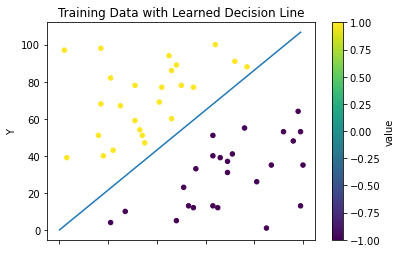

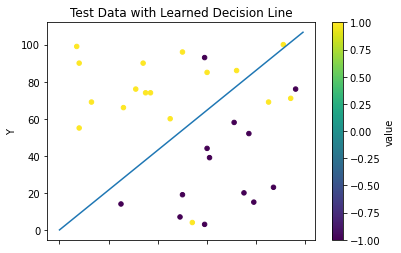

In [30]:
#Variables
passes = 100
step_size = 1
w = [0,0,0]

#Run PLA on training Data
result = pla(tr_points, tr_values, passes, step_size, w)

#Plot Training data with Learned Decision Line
plot_data(tr_data_ls, 'Training Data with Learned Decision Line', result['w'])

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result['w'])

#Get accuracy
accuracy_train = accuracy(result['w'], tr_data_ls)
accuracy_test =  accuracy(result['w'], test_data)

print_stats(True, False, w, step_size, result['w'], result['updates'], result['iterations'], accuracy_train, accuracy_test )

<h4>Case I. where w = [1,2,3] step_size = 1, in_order=True

First solution found:  [1, -95, 87]
1. We followed the above algorithm to generate data points
2. Linearly separable training data : True
3. Linearly separable test data: False
4. Initial learning weights: [1, 2, 3] and step size constant: 1
5. y = ( 1 + x * -95 ) /  -87
6. total times the weights were updated: 2
7. total iterations: 2
8. final missclassification error on training data: 0.0
Final missclassification error on test data: 0.13333333333333333


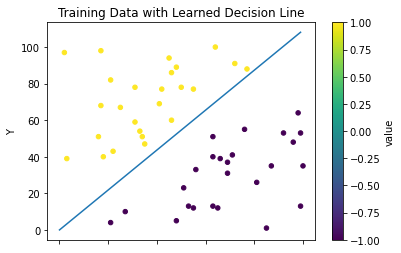

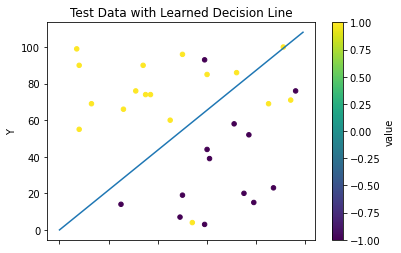

In [31]:
#Variables
passes = 100
step_size = 1
w = [1,2,3]

#Run PLA on training Data
result = pla(tr_points, tr_values, passes, step_size, w)

#Plot Training data with Learned Decision Line
plot_data(tr_data_ls, 'Training Data with Learned Decision Line', result['w'])

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result['w'])

#Get accuracy
accuracy_train = accuracy(result['w'], tr_data_ls)
accuracy_test =  accuracy(result['w'], test_data)

print_stats(True, False, w, step_size, result['w'], result['updates'], result['iterations'], accuracy_train, accuracy_test )

<h4> Case II. where w = [0,0,0] step_size = 2, in_order = True

First solution found:  [-2, -362, 336]
1. We followed the above algorithm to generate data points
2. training data linearly separable: True
3. test data linearly separable: False
4. initial learning weights: [0, 0, 0] and step size constant: 2
5. y = ( 1 * -2 + x * -362 ) /  -336
6. total times the weights were updated: 77. total iterations: 3
8. final missclassification error on training data: 0.0
Final missclassification error on test data: 0.13333333333333333


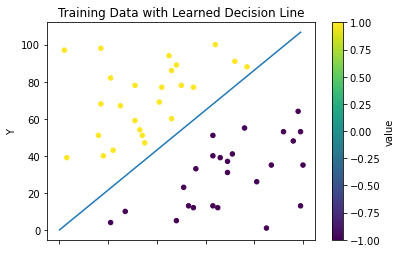

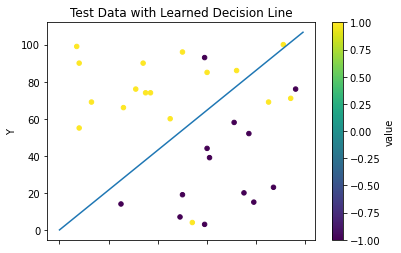

In [13]:
#Variables
passes = 100
step_size = 2
w = [0,0,0]

#Run PLA on training Data
result = pla(tr_points, tr_values, passes, step_size, w)

#Plot Training data with Learned Decision Line
plot_data(tr_data_ls, 'Training Data with Learned Decision Line', result['w'])

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result['w'])

#Get accuracy
accuracy_train = accuracy(result['w'], tr_data_ls)
accuracy_test =  accuracy(result['w'], test_data)

#Print Stats
print_stats(True, False, w, step_size, result['w'], result['updates'], result['iterations'], accuracy_train, accuracy_test)

<h4>Case III. where w = [0,0,0] step_size = 1, ordered = True

First solution found:  [-2, -204, 208]
1. We followed the above algorithm to generate data points
2. training data linearly separable: True
3. test data linearly separable: False
4. initial learning weights: [0, 0, 0] and step size constant: 1
5. y = ( 1 * -2 + x * -204 ) /  -208
6. total times the weights were updated: 127. total iterations: 6
8. final missclassification error on training data: 0.0
Final missclassification error on test data: 0.13333333333333333


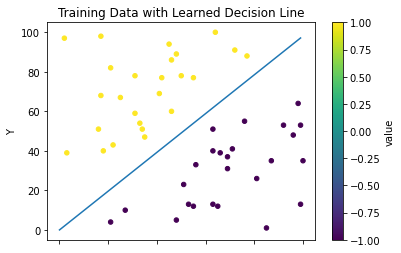

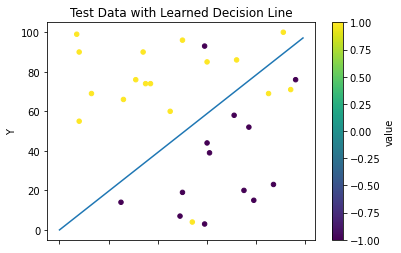

In [14]:
#Variables
passes = 100
step_size = 1
w = [0,0,0]

#example
ordered_training_data_ls = order(tr_data_ls)

#separate for sake of PLA
ordered_points = sep_data(ordered_training_data_ls)[0]
ordered_values = sep_data(ordered_training_data_ls)[1]

#Run PLA on training Data
result = pla(ordered_points, ordered_values, passes, step_size, w)

#Plot Training data with Learned Decision Line
plot_data(ordered_training_data_ls, 'Training Data with Learned Decision Line', result['w'])

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result['w'])

#Get accuracy
accuracy_train = accuracy(result['w'], tr_data_ls)
accuracy_test =  accuracy(result['w'], test_data)

print_stats(True, False, w, step_size, result['w'], result['updates'], result['iterations'], accuracy_train, accuracy_test)


<h2>Non-Linearly Separable Dataset

<h3>Generate Training Data:

In [15]:
tr_data_nls = generate_data(50, linearly_separable=False)

#separate for sake of PLA
tr_points_nls = sep_data(tr_data_nls)[0]
tr_values_nls = sep_data(tr_data_nls)[1]

<h4>Base case (w = [0,0,0], step_size = 1, in_order=True):

No perfect solution found, best solution found is  [-4, -134, 136]
1. We followed the above algorithm to generate data points
2. training data linearly separable: False
3. test data linearly separable: False
4. initial learning weights: [0, 0, 0] and step size constant: 1
5. y = ( 1 * -4 + x * -134 ) /  -136
6. total times the weights were updated: 11277. total iterations: 100
8. final missclassification error on training data: 0.1
Final missclassification error on test data: 0.13333333333333333


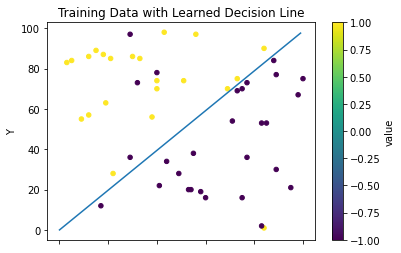

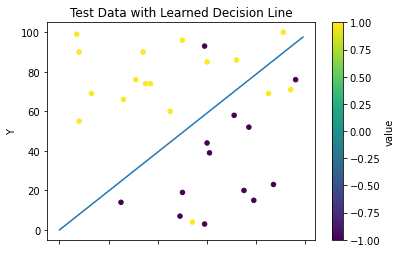

In [16]:
#Variables
passes = 100
step_size = 1
w = [0,0,0]

#Run PLA on training Data
result = pla(tr_points_nls, tr_values_nls, passes, step_size, w)

#Plot Training data with Learned Decision Line
plot_data(tr_data_nls, 'Training Data with Learned Decision Line', result['w'])

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result['w'])

#Get accuracy
accuracy_train = accuracy(result['w'], tr_data_nls)
accuracy_test =  accuracy(result['w'], test_data)

print_stats(False, False, w, step_size, result['w'], result['updates'], result['iterations'], accuracy_train, accuracy_test)

<h4>Case I. where w = [1,2,3], step_size = 1, in_order=True:

No perfect solution found, best solution found is  [1, -52, 52]
1. We followed the above algorithm to generate data points
2. training data linearly separable: False
3. test data linearly separable: False
4. initial learning weights: [1, 2, 3] and step size constant: 1
5. y = ( 1 * 1 + x * -52 ) /  -52
6. total times the weights were updated: 11417. total iterations: 100
8. final missclassification error on training data: 0.1
Final missclassification error on test data: 0.13333333333333333


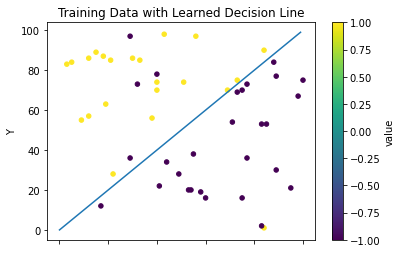

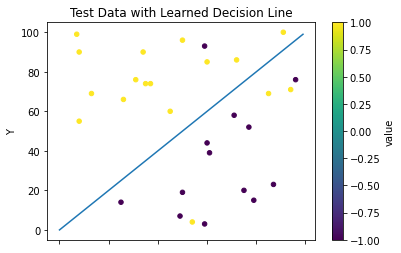

In [17]:
#Variables
passes = 100
step_size = 1
w = [1,2,3]

#Run PLA on training Data
result = pla(tr_points_nls, tr_values_nls, passes, step_size, w)

#Plot Training data with Learned Decision Line
plot_data(tr_data_nls, 'Training Data with Learned Decision Line', result['w'])

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result['w'])

#Get accuracy
accuracy_train = accuracy(result['w'], tr_data_nls)
accuracy_test =  accuracy(result['w'], test_data)

print_stats(False, False, w, step_size, result['w'], result['updates'], result['iterations'], accuracy_train, accuracy_test )

<h4> Case II. where w = [0,0,0] step_size = 2, in_order = True

No perfect solution found, best solution found is  [-8, -268, 272]
1. We followed the above algorithm to generate data points
2. training data linearly separable: False
3. test data linearly separable: False
4. initial learning weights: [0, 0, 0] and step size constant: 2
5. y = ( 1 * -8 + x * -268 ) /  -272
6. total times the weights were updated: 11277. total iterations: 100
8. final missclassification error on training data: 0.1
Final missclassification error on test data: 0.13333333333333333


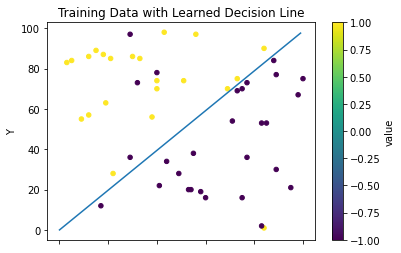

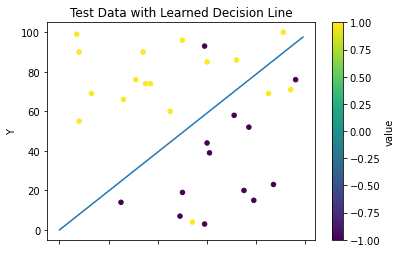

In [18]:
#Variables
passes = 100
step_size = 2
w = [0,0,0]

#Run PLA on training Data
result = pla(tr_points_nls, tr_values_nls, passes, step_size, w)

#Plot Training data with Learned Decision Line
plot_data(tr_data_nls, 'Training Data with Learned Decision Line', result['w'])

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result['w'])

#Get accuracy
accuracy_train = accuracy(result['w'], tr_data_nls)
accuracy_test =  accuracy(result['w'], test_data)

print_stats(False, False, w, step_size, result['w'], result['updates'], result['iterations'], accuracy_train, accuracy_test )

<h4> Case III. where w = [0,0,0] step_size = 1, in_order = False

No perfect solution found, best solution found is  [-4, -33, 33]
1. We followed the above algorithm to generate data points
2. training data linearly separable: False
3. test data linearly separable: False
4. initial learning weights: [0, 0, 0] and step size constant: 1
5. y = ( 1 * -4 + x * -33 ) /  -33
6. total times the weights were updated: 3347. total iterations: 100
8. final missclassification error on training data: 0.1
Final missclassification error on test data: 0.13333333333333333


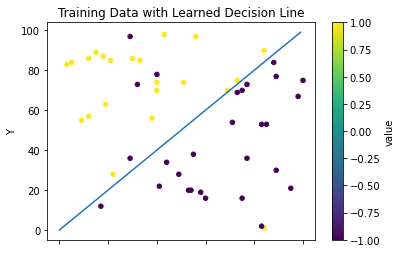

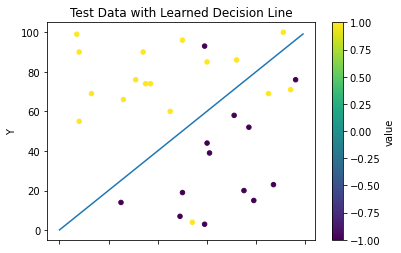

In [20]:
#Variables
passes = 100
step_size = 1
w = [0,0,0]

#example
ordered_training_data_nls = order(tr_data_nls)

#separate for sake of PLA
ordered_points_nls = sep_data(ordered_training_data_nls)[0]
ordered_values_nls = sep_data(ordered_training_data_nls)[1]

#Run PLA on training Data
result = pla(ordered_points_nls, ordered_values_nls, passes, step_size, w)

#Plot Training data with Learned Decision Line
plot_data(ordered_training_data_nls, 'Training Data with Learned Decision Line', result['w'])

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result['w'])

#Get accuracy
accuracy_train = accuracy(result['w'], tr_data_nls)
accuracy_test =  accuracy(result['w'], test_data)

print_stats(False, False, w, step_size, result['w'], result['updates'], result['iterations'], accuracy_train, accuracy_test )
